# installation instructions
```
git clone https://github.com/ferrine/cvx_ha
cd cvx_ha
pip install -e .
pip install -r requirements-extra.txt # for jupyter notebook imports
```
## Verifying installation
```
pip install -r requirements-dev.txt # for tests
py.test
```

Contact me on telegram if any assistance needed

In [3]:
import cvx_ha
import torch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

# Task 1

## Projected SGD

1. Figure out the following relation
$$
\begin{align}
x_{t+1} &= argmin_{x \in D}
    \left\{
        \|x-(x_{t-1} - \eta_{t}g_t)\|_2^2
    \right\}\\
        &= \Pi_D(x_{t-1} - \eta_{t}g_t)
\end{align}
$$

Where $D$ is a convex set and $\Pi_D(x) = argmin_{y \in D} \|y-x\|_2^2$.

a) $$
\begin{align}
\Pi_D(x) &= argmin_{y \in D} \|y-x\|_2^2\\
&=argmin_{y \in D} (y-x)^\top(y-x)\\
&=argmin_{y \in D} y^\top y - 2 x^\top y + x^\top x\\
&=argmin_{y \in D} (-x)^\top y + \frac{1}{2} y^\top y
\end{align}
$$
And next

$$
\begin{align}
\Pi^*_D(x, \alpha) &=argmin_{y \in D} x^\top y + \frac{1}{2\alpha} y^\top y\\
&=argmin_{y \in D} (x\alpha)^\top y + \frac{1}{2} y^\top y\\
\end{align}
$$

$$\Pi^*_D(x, \alpha) = \Pi_D(-x\alpha)$$

In [4]:
from scipy.optimize import minimize

In [5]:
def project_naive_dual(z, alpha):
    m = len(z)
    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x)-1}]
    argmin = minimize(lambda x: x.dot(z) + 1/2/alpha*x.dot(x),
                      constraints=constraints,
                      bounds=[(0,1) for i in range(m)],
                      x0=np.ones((m))/m)
    return argmin['x']
def project_naive(z):
    m = len(z)
    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x)-1}]
    argmin = minimize(lambda x: ((z-x)**2).sum(),
                      constraints=constraints,
                      bounds=[(0,1) for i in range(m)],
                      x0=np.ones((m))/m)
    return argmin['x']

Just a check I do all right solving all analyticaly. I studied a set of articles to get analytical solutions for projections and bregman projection (used in mirror descent)
Here they are 

* https://bayen.eecs.berkeley.edu/sites/default/files/conferences/efficient_bregman_projections.pdf
* http://www.mblondel.org/publications/mblondel-icpr2014.pdf

In [13]:
x = np.random.randn(100)

In [14]:
x

array([-0.10387439,  0.72295066,  0.17479535, -2.67325226,  0.59315641,
       -1.84355714,  0.30819246,  0.5571987 ,  0.49533906,  0.62873027,
        1.4653828 , -1.03454213,  1.35026652,  1.66326518,  1.1562442 ,
       -1.56402841, -0.12029882, -0.90266283,  1.33130833,  0.44134301,
        0.61212479,  0.06805251,  1.72777485, -0.76851471, -1.54658677,
       -0.34516821,  0.50124504, -0.77252553,  0.24708943, -1.12672386,
       -0.66910437, -0.92115893,  0.92196728, -0.20529585, -0.887516  ,
       -0.96829118,  0.13103374, -0.35403351,  0.03797183,  1.03988144,
        0.86584947,  0.52469518,  1.09211671, -0.47461266, -0.02168124,
       -0.77331789, -0.21866906, -0.59511927,  0.3848122 , -2.01643162,
       -0.4778649 , -1.1648989 ,  0.30940986, -2.72077889,  0.22121712,
        0.55403127, -0.63453987,  0.71844972, -1.0569378 ,  0.51972841,
       -1.19240029,  0.22312568, -0.14560265, -0.72617844,  1.11426448,
       -0.7532731 , -0.48975837,  0.12146444, -2.44561302,  0.41

In [15]:
cvx_ha.ha1.simplex_projection(-torch.from_numpy(x).float()*.1).numpy()

array([0.        , 0.        , 0.        , 0.16684893, 0.        ,
       0.08387939, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00297788, 0.        , 0.        , 0.        ,
       0.05592651, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05418234,
       0.        , 0.        , 0.        , 0.        , 0.01219606,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.10116682,
       0.        , 0.01601356, 0.        , 0.17160156, 0.        ,
       0.        , 0.        , 0.        , 0.00521745, 0.        ,
       0.01876371, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.14408496, 0.        ,
       0.        , 0.        , 0.        , 0.04396472, 0.01750

In [16]:
cvx_ha.ha1.simplex_dual_projection(torch.from_numpy(x).float(), .1).numpy()

array([0.        , 0.        , 0.        , 0.16684893, 0.        ,
       0.08387939, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00297788, 0.        , 0.        , 0.        ,
       0.05592651, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05418234,
       0.        , 0.        , 0.        , 0.        , 0.01219606,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.10116682,
       0.        , 0.01601356, 0.        , 0.17160156, 0.        ,
       0.        , 0.        , 0.        , 0.00521745, 0.        ,
       0.01876371, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.14408496, 0.        ,
       0.        , 0.        , 0.        , 0.04396472, 0.01750

In [17]:
r = (project_naive(-x*.1))
r[r<1e-5]=0
r

array([0.        , 0.        , 0.        , 0.16669682, 0.        ,
       0.08381636, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0034812 , 0.        , 0.        , 0.        ,
       0.05589348, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05415119,
       0.        , 0.        , 0.        , 0.        , 0.01217043,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.10108525,
       0.        , 0.01598873, 0.        , 0.17144438, 0.        ,
       0.        , 0.        , 0.        , 0.00556988, 0.        ,
       0.01873946, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.14395733, 0.        ,
       0.        , 0.        , 0.        , 0.04394452, 0.01748

In [18]:
r = (project_naive_dual(x, .1))
r[r<1e-5]=0
r

array([0.        , 0.        , 0.        , 0.16685282, 0.        ,
       0.08388413, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00297855, 0.        , 0.        , 0.        ,
       0.0559175 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05417396,
       0.        , 0.        , 0.        , 0.        , 0.01219671,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.10117343,
       0.        , 0.0160144 , 0.        , 0.1716049 , 0.        ,
       0.        , 0.        , 0.        , 0.00521804, 0.        ,
       0.01876465, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.14409365, 0.        ,
       0.        , 0.        , 0.        , 0.04395979, 0.01750

In [19]:
cvx_ha.ha1.simplex_projection(torch.from_numpy(x).float())

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0203, 0.0000, 0.0000, 0.2182, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.2827, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0464, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4324,
        0.0000])

In [20]:
xh = project_naive(x)

In [22]:
np.allclose(
    cvx_ha.ha1.simplex_projection(torch.from_numpy(x).float()), 
    project_naive(x), atol=1e-3
)

True

Analytical solution is much much faster

In [23]:
%timeit cvx_ha.ha1.simplex_projection(torch.from_numpy(x).float())

322 µs ± 60.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [24]:
%timeit project_naive(x)

59.2 ms ± 4.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
def f(x, A):
    return torch.relu(1 - A @ x).mean()

In [37]:
import functools
import numpy as np
import collections
import itertools

Setup = collections.namedtuple('Setup', 'x,A,closure')
def prepare_experiment(m, N=150, stochastic=False):
    x = torch.ones(m, requires_grad=True)
    x.data.div_(m)
    A = torch.randn(N, m)
    def closure():
        if stochastic:
            a = A[np.random.randint(N, size=(1,))]
        else:
            a = A
        y = f(x, a)
        y.backward()
        return y.item()
    return Setup(x, A, closure)

def run_proj_sgd(x, closure, iters=1600, lr_policy=None, lr0=1., callback=None):
    vals = []
    opt = cvx_ha.ha1.ProjectedSGD([x], lr=lr0, projection=cvx_ha.ha1.simplex_projection)
    if lr_policy is not None:
        lr_policy = torch.optim.lr_scheduler.LambdaLR(opt, lr_policy)
    for i in range(iters):
        opt.zero_grad()
        if lr_policy is not None:
            lr_policy.step(i)
        y = opt.step(closure)
        vals.append(y)
        if callback is not None:
            callback(x, y, i)
    return np.asarray(vals)

def run_dual_averaging(x, closure, iters=1600, lr_policy=None, lr0=1., callback=None):
    vals = []
    opt = cvx_ha.ha1.DualAveraging([x], lr=lr0, dual_projection=cvx_ha.ha1.simplex_dual_projection)
    if lr_policy is not None:
        lr_policy = torch.optim.lr_scheduler.LambdaLR(opt, lr_policy)
    for i in range(iters):
        opt.zero_grad()
        if lr_policy is not None:
            lr_policy.step(i)
        y = opt.step(closure)
        vals.append(y)
        if callback is not None:
            callback(x, y, i)
    return np.asarray(vals)

def run_mirror(x, closure, iters=1600, lr_policy=None, lr0=1., callback=None):
    vals = []
    opt = cvx_ha.ha1.MirrorDescent([x], lr=lr0, brehman_projection=cvx_ha.ha1.mirror_descent.brehman_exp_simplex_projection)
    if lr_policy is not None:
        lr_policy = torch.optim.lr_scheduler.LambdaLR(opt, lr_policy)
    for i in range(iters):
        opt.zero_grad()
        if lr_policy is not None:
            lr_policy.step(i)
        y = opt.step(closure)
        vals.append(y)
        if callback is not None:
            callback(x, y, i)
    return np.asarray(vals)

In [38]:
import tqdm

In [54]:
setup = prepare_experiment(m=60, stochastic=True)
x0 = setup[0].data.clone()


class CountNonzero(object):
    def __init__(self):
        self.storage = []
    
    def __call__(self, x, y, i):
        self.storage.append((x > 0).float().mean().item())

class Margin(object):
    def __init__(self, setup, f_star=None):
        x0 = setup.x.data.clone()
        self.setup = setup
        
        if f_star is None:
            def np_f(x):
                return np.clip(1 - setup.A.numpy() @ x, 0, np.inf).mean()

            solution = minimize(np_f, x0=x0.data.numpy(),
                                constraints=[{'type': 'eq', 'fun': lambda x: np.sum(x)-1}],
                                bounds=[(0, 1)]*len(x0))
            self.f_star = solution.fun
        else:
            self.f_star = f_star
        setup[0].data.set_(x0.clone())
        self.storage = []

    def deterministic_loss(self, backward=True):
        if backward:
            loss = f(self.setup.x, self.setup.A)
            loss.backward()
        else:
            with torch.no_grad():
                loss = f(self.setup.x, self.setup.A)
        return loss.item()

    def __call__(self, x, y, i):
        self.storage.append(self.deterministic_loss(False)-self.f_star)

def join(*cbs):
    def cb(*_):
        for c in cbs:
            c(*_)
    return cb
# lambda t:1/((iters*(t+1))**.5)
# lambda t:1/((t+1)**.5)
def run_experiment(m, N=150, da_policy=None, sgd_policy=None, mirror_policy=None, iters=1600):
    setup = prepare_experiment(m=m, N=N, stochastic=True)
    setup_det = prepare_experiment(m=m, N=N, stochastic=False)
    setup_det.A.set_(setup.A)
    setup_det.x.data.set_(setup.x.data.clone())

    x0 = setup[0].data.clone()
    def reset():
        setup[0].data.set_(x0.clone())
        setup_det[0].data.set_(x0.clone())
    reset()
    nonzero_da = CountNonzero()
    margin_da = Margin(setup)
    f_da = run_dual_averaging(
        setup.x, setup.closure, iters=iters,
        lr_policy=da_policy,
        callback=join(nonzero_da, margin_da)
    )
    
    reset()
    nonzero_proj_sgd = CountNonzero()
    margin_proj_sgd = Margin(setup, f_star=margin_da.f_star)
    f_proj_sgd = run_proj_sgd(
        setup.x, setup.closure, iters=iters,
        lr_policy=sgd_policy,
        callback=join(nonzero_proj_sgd, margin_proj_sgd)
    )
    
    reset()
    nonzero_mirror = CountNonzero()
    margin_mirror = Margin(setup, f_star=margin_da.f_star)
    f_mirror = run_mirror(
        setup.x, setup.closure, iters=iters,
        lr_policy=mirror_policy,
        callback=join(margin_mirror, nonzero_mirror)
    )

    return dict(
        da=dict(
            margin=np.asarray(margin_da.storage),
            nonzero=np.asarray(nonzero_da.storage)
        ),
        sgd=dict(
            margin=np.asarray(margin_proj_sgd.storage),
            nonzero=np.asarray(nonzero_proj_sgd.storage)
        ),
        mirror=dict(
            margin=np.asarray(margin_mirror.storage),
            nonzero=np.asarray(nonzero_mirror.storage)
        ),
        meta=dict(f_star=margin_da.f_star)
    )

In [79]:
def plot_results(results):
    fig, ax = plt.subplots(2, 1, figsize=(16, 10))
    
    ax[0].plot(results['da']['margin'], color='b', alpha=0.3)
    ax[0].plot(results['sgd']['margin'], color='r', alpha=0.3)
    ax[0].plot(results['mirror']['margin'], color='g', alpha=0.3)
    
    ax[0].plot(
        numpy.minimum.accumulate(results['da']['margin']), 
        color='b', label='dual averaging', alpha=1)
    ax[0].plot(
        numpy.minimum.accumulate(results['sgd']['margin']),
        color='r', label='proj sgd', alpha=1)
    ax[0].plot(
        numpy.minimum.accumulate(results['mirror']['margin']), 
        color='g', label='mirror descent', alpha=1)
    
    
    ax[0].axhline(0, color='black')

    ax[1].plot(results['da']['nonzero'], color='b', label='dual averaging', alpha=0.3)
    ax[1].plot(results['sgd']['nonzero'], color='r', label='proj sgd', alpha=0.3)
    ax[1].plot(results['mirror']['nonzero'], color='g', label='mirror_descent', alpha=0.3)
    
    ax[0].set_xlabel('step')
    ax[0].set_ylabel('$f(x_t)-f^*$');
    ax[1].set_xlabel('step')
    ax[1].set_ylabel('nonzero fraction');
    ax[0].legend()
    return ax

# Experiments with M=60

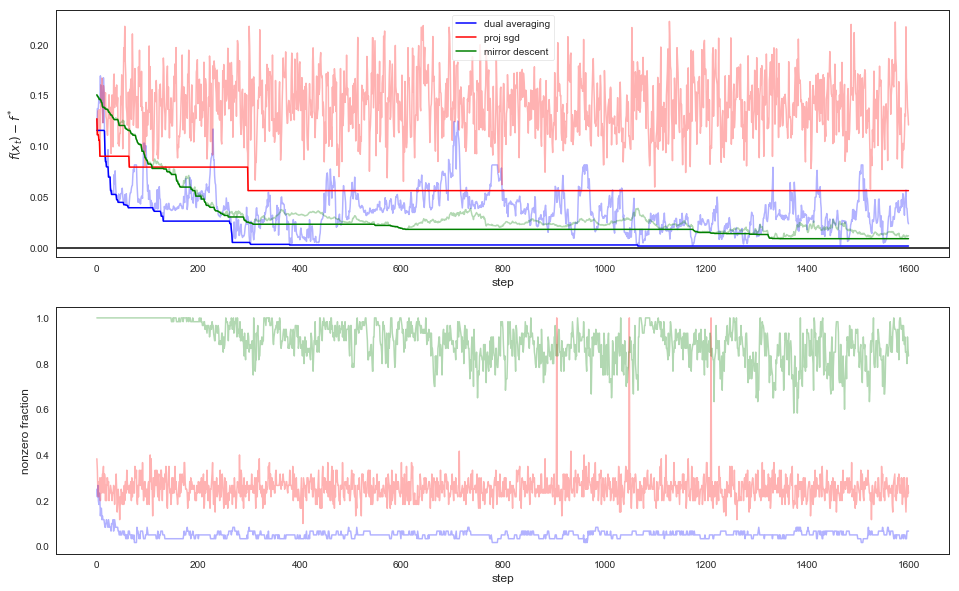

In [72]:
results = run_experiment(
    m=60, N=150,
    da_policy=lambda t: 1e-1,
    sgd_policy=lambda t: 1e-1,
    mirror_policy=lambda t: 1e-1,
)
plot_results(results)

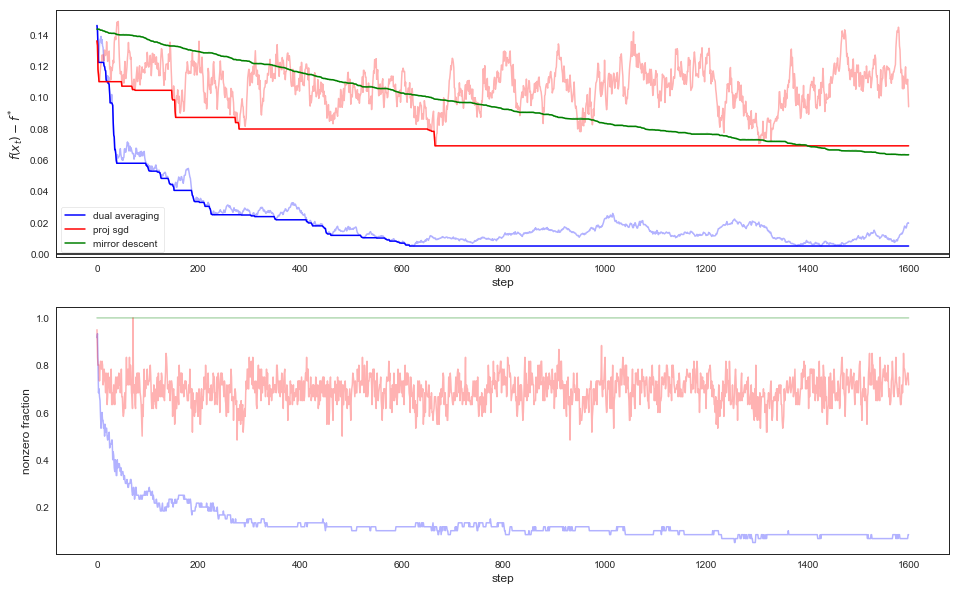

In [73]:
results = run_experiment(
    m=60, N=150,
    da_policy=lambda t:1e-2,
    sgd_policy=lambda t:1e-2,
    mirror_policy=lambda t:1e-2,
)
plot_results(results)

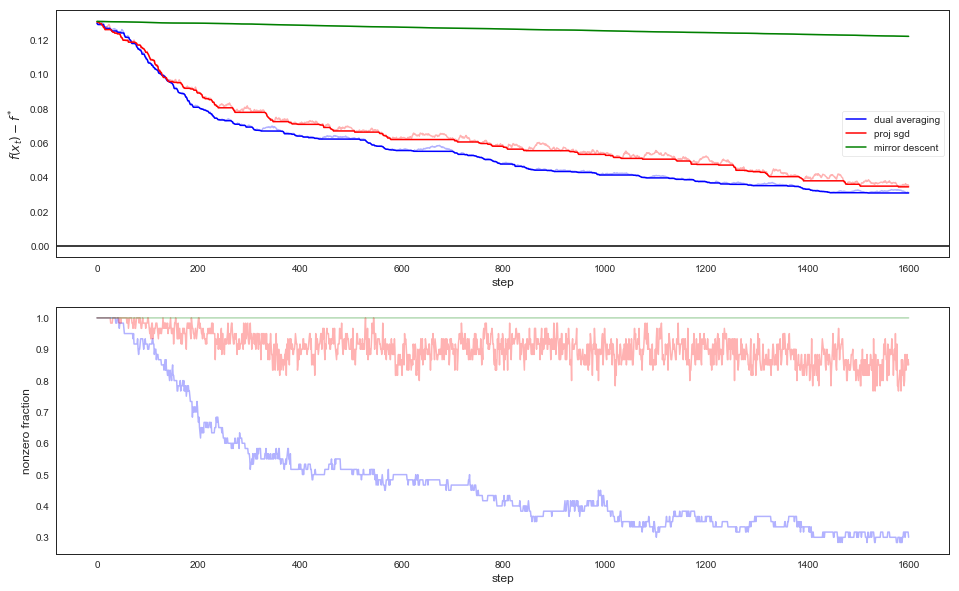

In [74]:
results = run_experiment(
    m=60, N=150,
    da_policy=lambda t:1e-3,
    sgd_policy=lambda t:1e-3,
    mirror_policy=lambda t:1e-3,
)
plot_results(results)

# Probably the best lr parameters

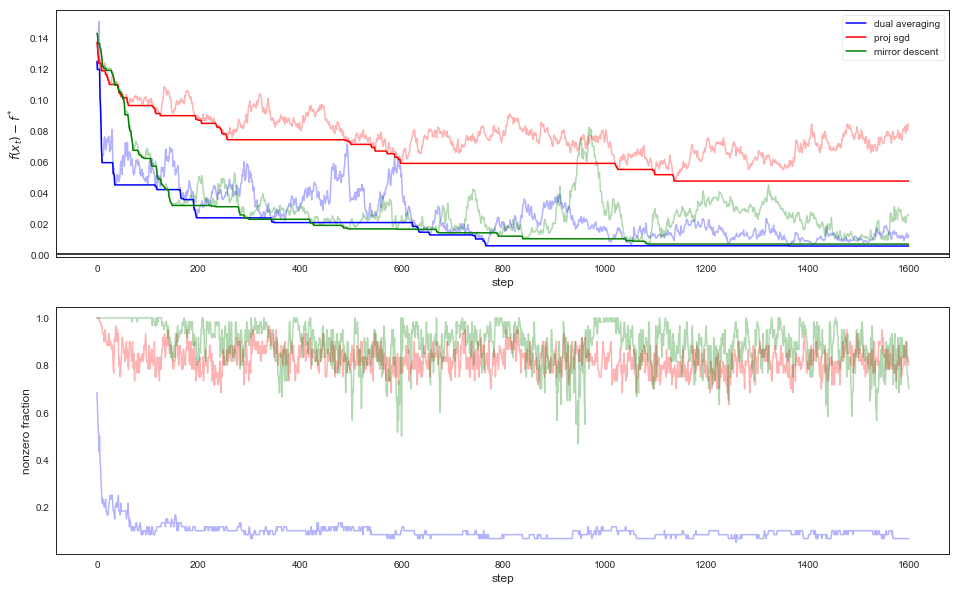

In [75]:
results = run_experiment(
    m=60, N=150,
    sgd_policy=lambda t:1/((1600*60)**.5),
    da_policy=lambda t:1/(1600**.5),
    mirror_policy=lambda t:1/np.log(1600),
)
plot_results(results)

# Experiments with M=10

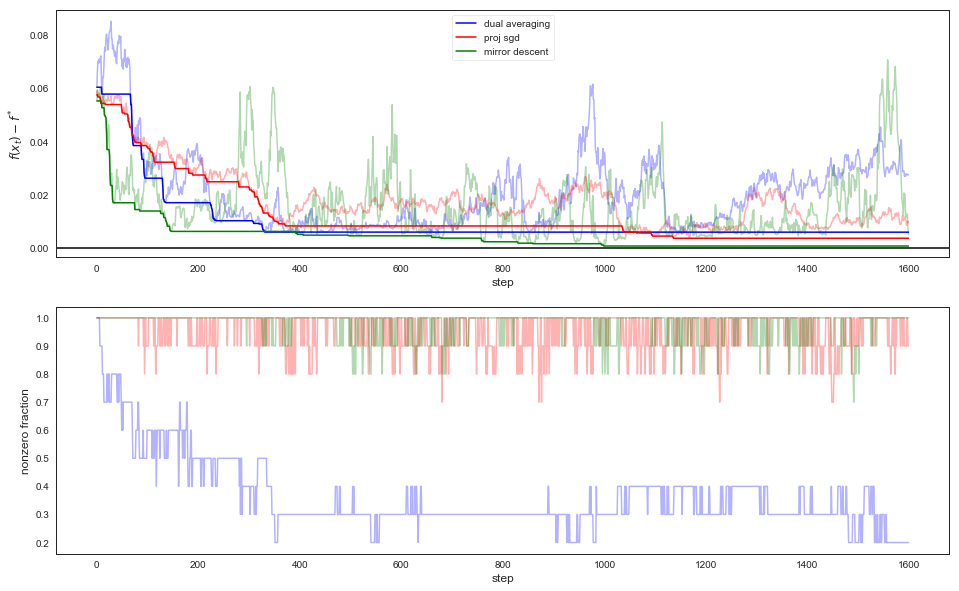

In [76]:
results = run_experiment(
    m=10, N=150,
    sgd_policy=lambda t:1/((1600*10)**.5),
    da_policy=lambda t:1/(1600**.5),
    mirror_policy=lambda t:1/np.log(1600),
)
plot_results(results)

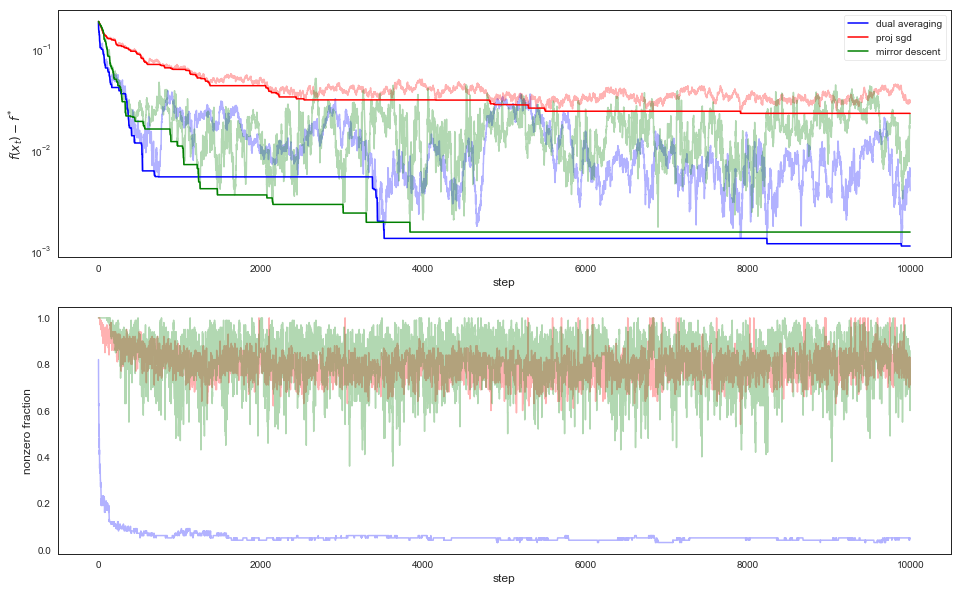

In [80]:
results = run_experiment(
    m=100, N=150, iters=10000,
    sgd_policy=lambda t:1/((10000*(100))**.5),
    da_policy=lambda t:1/((10000)**.5),
    mirror_policy=lambda t:1/np.log(10000),
    
)
ax = plot_results(results)
ax[0].set_yscale('log')

# Conclusions
Dual averaging converges consistently better. I was confused mirror descent performed worse on this task. I found it very sensitive to the learning rate parameter and it is hard to figure out the best.